## Numerical Simulation Laboratory (NSL)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

### Exercise 1

In [2]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [5]:
def compile_model(optim):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim,
                  metrics=['accuracy'])
    return model

In [6]:
batch_size = 32
epochs = 5
optim = "Adam"

# create the deep neural net
model_DNN = compile_model(optim)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2835 - accuracy: 0.9146 - val_loss: 0.1157 - val_accuracy: 0.9626
Epoch 2/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.1199 - accuracy: 0.9666 - val_loss: 0.0838 - val_accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.0851 - accuracy: 0.9751 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 4/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.0683 - accuracy: 0.9801 - val_loss: 0.0790 - val_accuracy: 0.9767
Epoch 5/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0718 - val_accuracy: 0.9797


10000/10000 [==============================] - 1s 125us/step

Test loss: 0.07182760845171725
Test accuracy: 0.9797000288963318


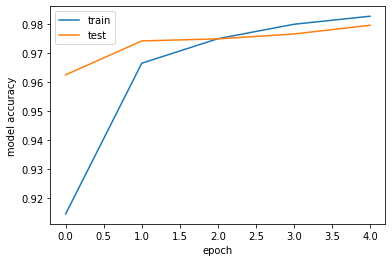

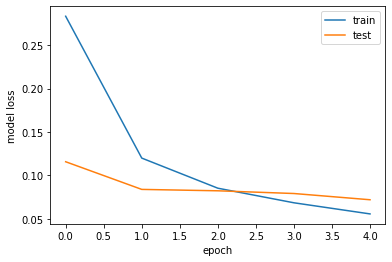

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [8]:
optim = "RMSprop"

model_DNN = compile_model(optim)

history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 260us/step - loss: 0.2829 - accuracy: 0.9191 - val_loss: 0.1331 - val_accuracy: 0.9638
Epoch 2/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.1569 - accuracy: 0.9611 - val_loss: 0.1189 - val_accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.1449 - accuracy: 0.9670 - val_loss: 0.1324 - val_accuracy: 0.9734
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.1482 - accuracy: 0.9693 - val_loss: 0.1517 - val_accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.1458 - accuracy: 0.9713 - val_loss: 0.1665 - val_accuracy: 0.9729


10000/10000 [==============================] - 1s 63us/step

Test loss: 0.1664954185831222
Test accuracy: 0.9728999733924866


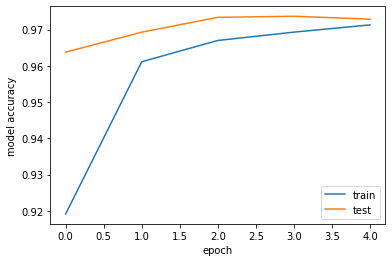

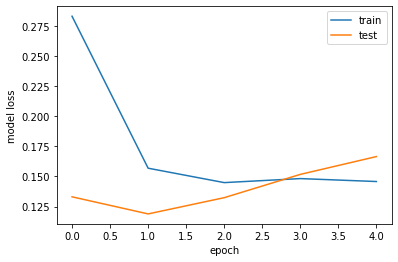

In [9]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Exercise 2

In [10]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [11]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
                               
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [14]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 384us/step - loss: 0.6398 - accuracy: 0.7923 - val_loss: 0.2053 - val_accuracy: 0.9381
Epoch 2/5
60000/60000 [==============================] - 22s 370us/step - loss: 0.1796 - accuracy: 0.9440 - val_loss: 0.1333 - val_accuracy: 0.9597
Epoch 3/5
60000/60000 [==============================] - 21s 354us/step - loss: 0.1294 - accuracy: 0.9599 - val_loss: 0.1024 - val_accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 28s 466us/step - loss: 0.1058 - accuracy: 0.9668 - val_loss: 0.0848 - val_accuracy: 0.9740
Epoch 5/5
10000/10000 [==============================] - 1s 95us/step

Test loss: 0.06867941374164074
Test accuracy: 0.9778000116348267


10000/10000 [==============================] - 1s 98us/step

Test loss: 0.06867941374164074
Test accuracy: 0.9778000116348267


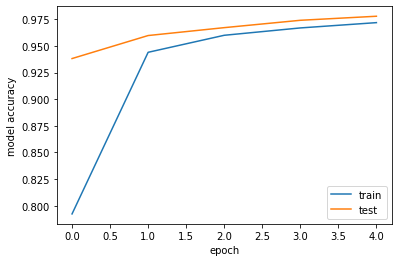

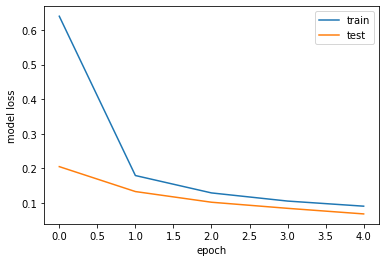

In [16]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Print your NN layers:

In [17]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_1
1 max_pooling2d_1
2 conv2d_2
3 max_pooling2d_2
4 flatten_1
5 dense_7
6 dense_8


Display your filters:

(5, 5, 1, 10)


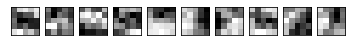

In [18]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

In [19]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

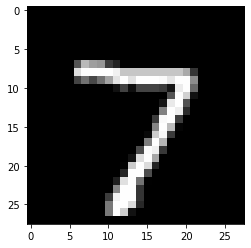

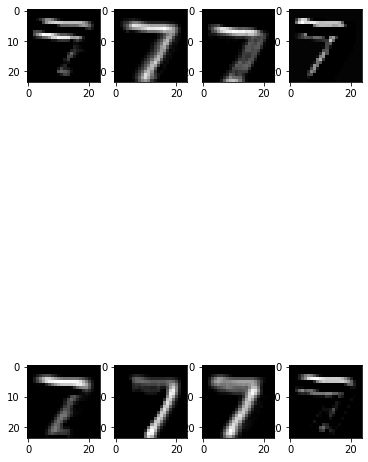

In [20]:
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

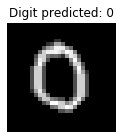

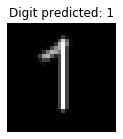

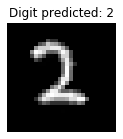

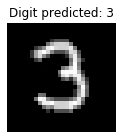

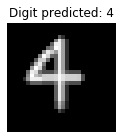

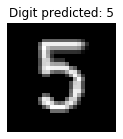

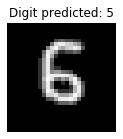

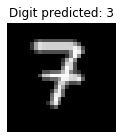

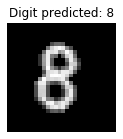

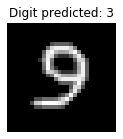

Errors:  3


In [21]:
from PIL import Image
import os

err=0

for digit in range(10):
    digit_filename = "./digits/"+str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    plt.figure(figsize=(2,2))
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1,xdim*ydim)

    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
    
    if np.argmax(pred_0) != digit:
        err=err+1
       
    plt.title("Digit predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off')
    plt.show()
    
print("Errors: ", err)